In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
stocks = pd.read_csv("~/Repositories/datasets/1977-2017-SP500.csv")
stocks['Date'] = stocks['Date'].convert_objects(convert_dates="coerce")
stocks = stocks.sort_index(by='Date')
stocks = stocks.set_index('Date')

/Users/vsquared/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/vsquared/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


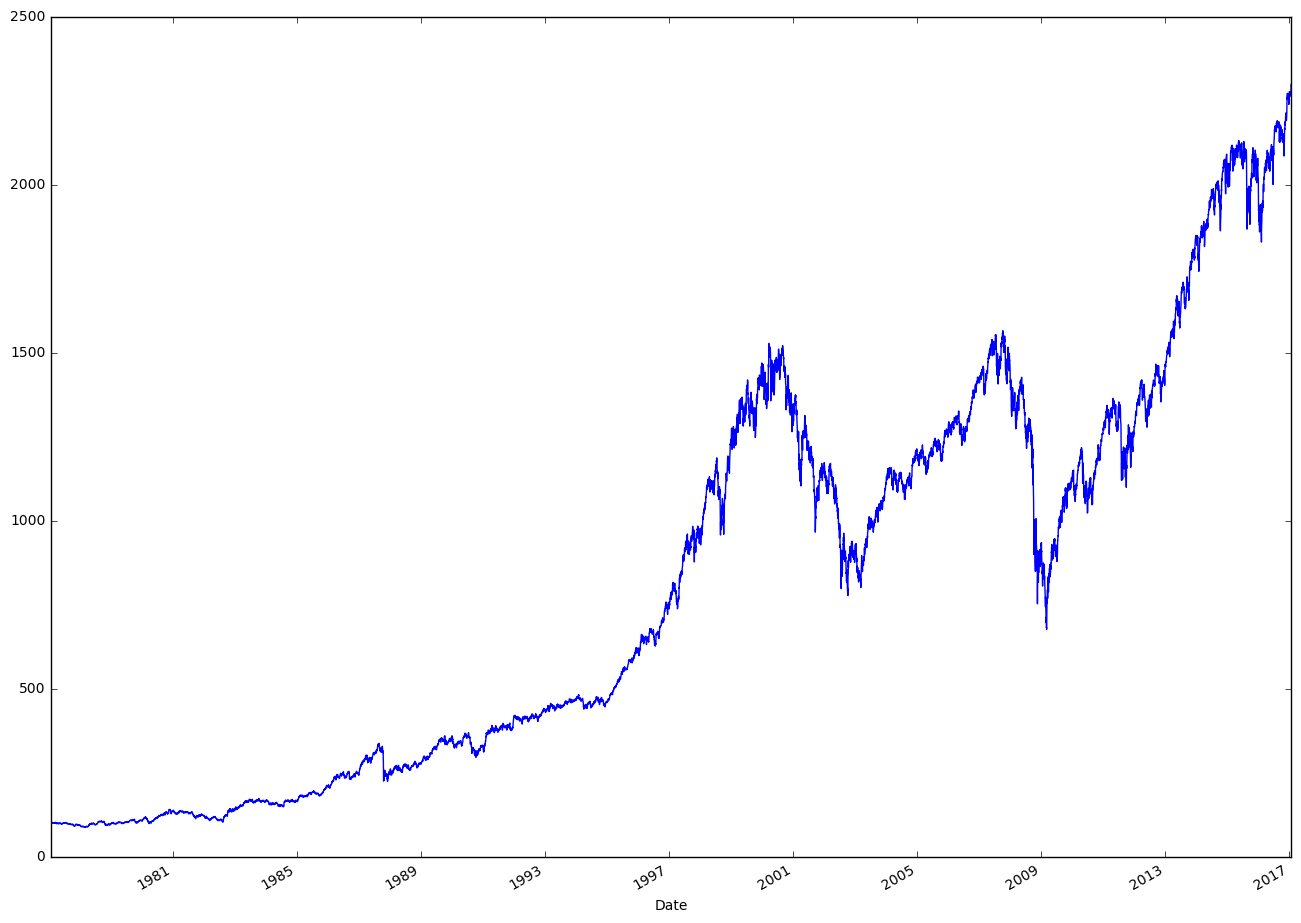

In [3]:
stocks['Close'].plot(figsize=(16,12))

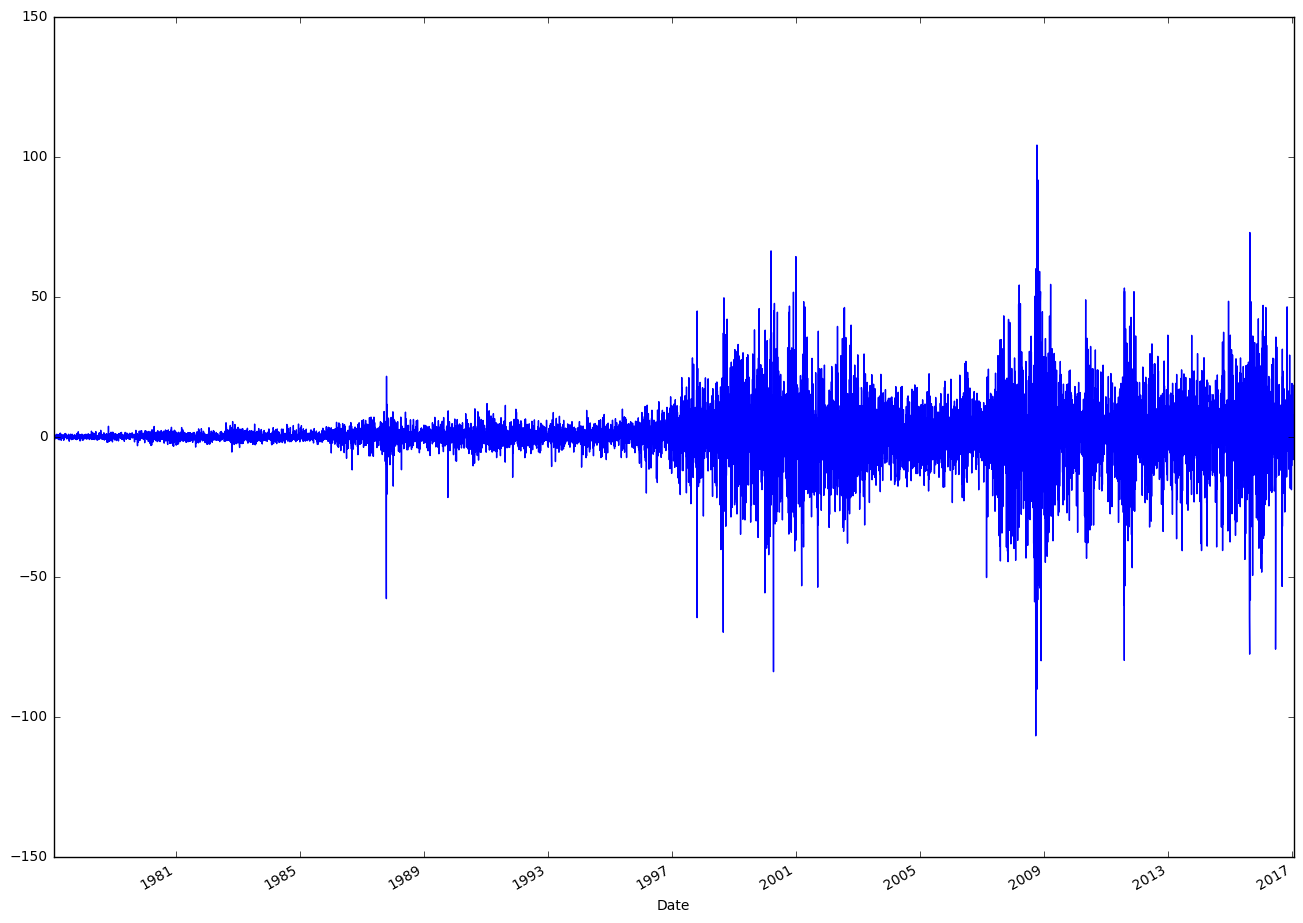

In [4]:
# evaluate differences
stocks['First Difference'] = stocks['Close'] - stocks['Close'].shift()
stocks['First Difference'].plot(figsize=(16,12))

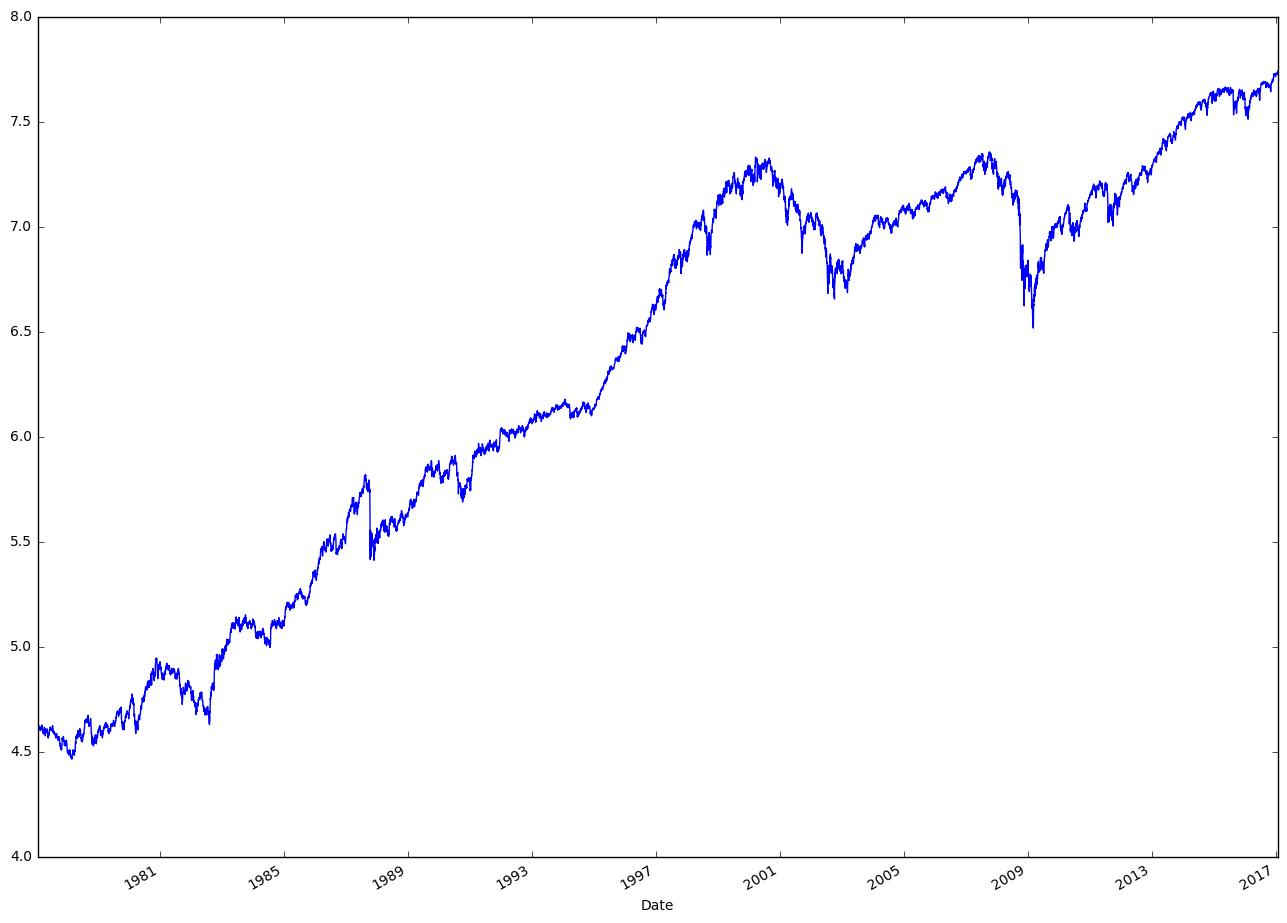

In [5]:
stocks['Natural Log'] = stocks['Close'].apply(lambda x: np.log(x))
stocks['Natural Log'].plot(figsize=(16,12))

/Users/vsquared/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  if __name__ == '__main__':
/Users/vsquared/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  from ipykernel import kernelapp as app


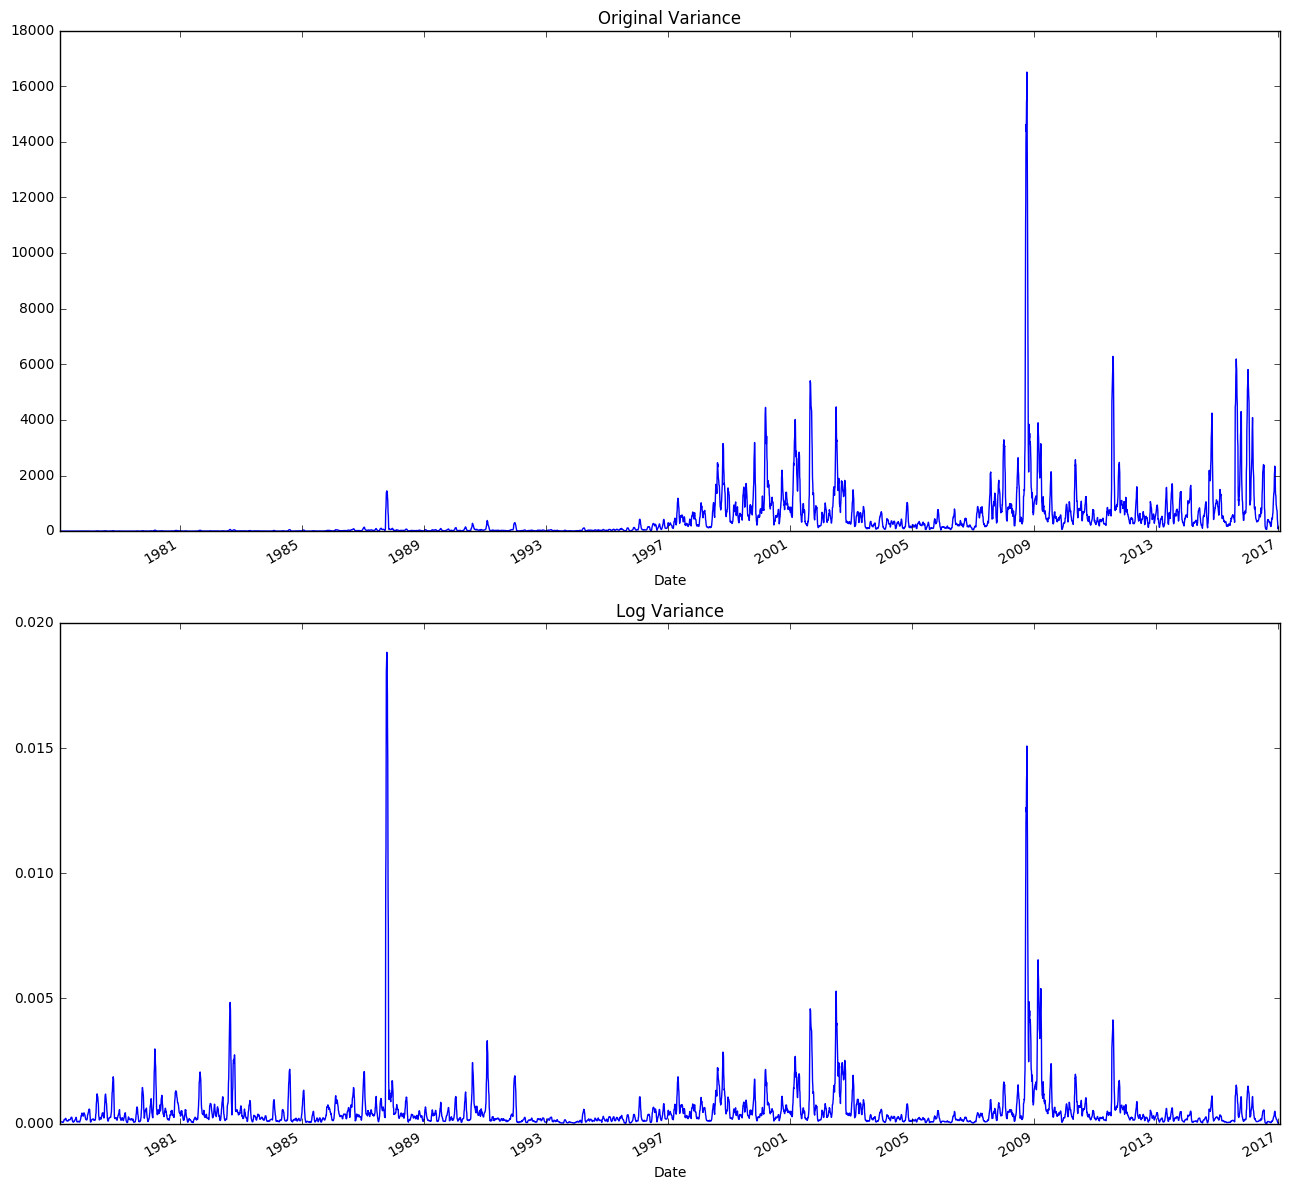

In [8]:
stocks['Original Variance'] = pd.rolling_var(stocks['Close'], 30, min_periods=None, freq=None, center=True)
stocks['Log Variance'] = pd.rolling_var(stocks['Natural Log'], 30, min_periods=None, freq=None, center=True)

fig, ax = plt.subplots(2, 1, figsize=(13, 12))
stocks['Original Variance'].plot(ax=ax[0], title='Original Variance')
stocks['Log Variance'].plot(ax=ax[1], title="Log Variance")
fig.tight_layout()

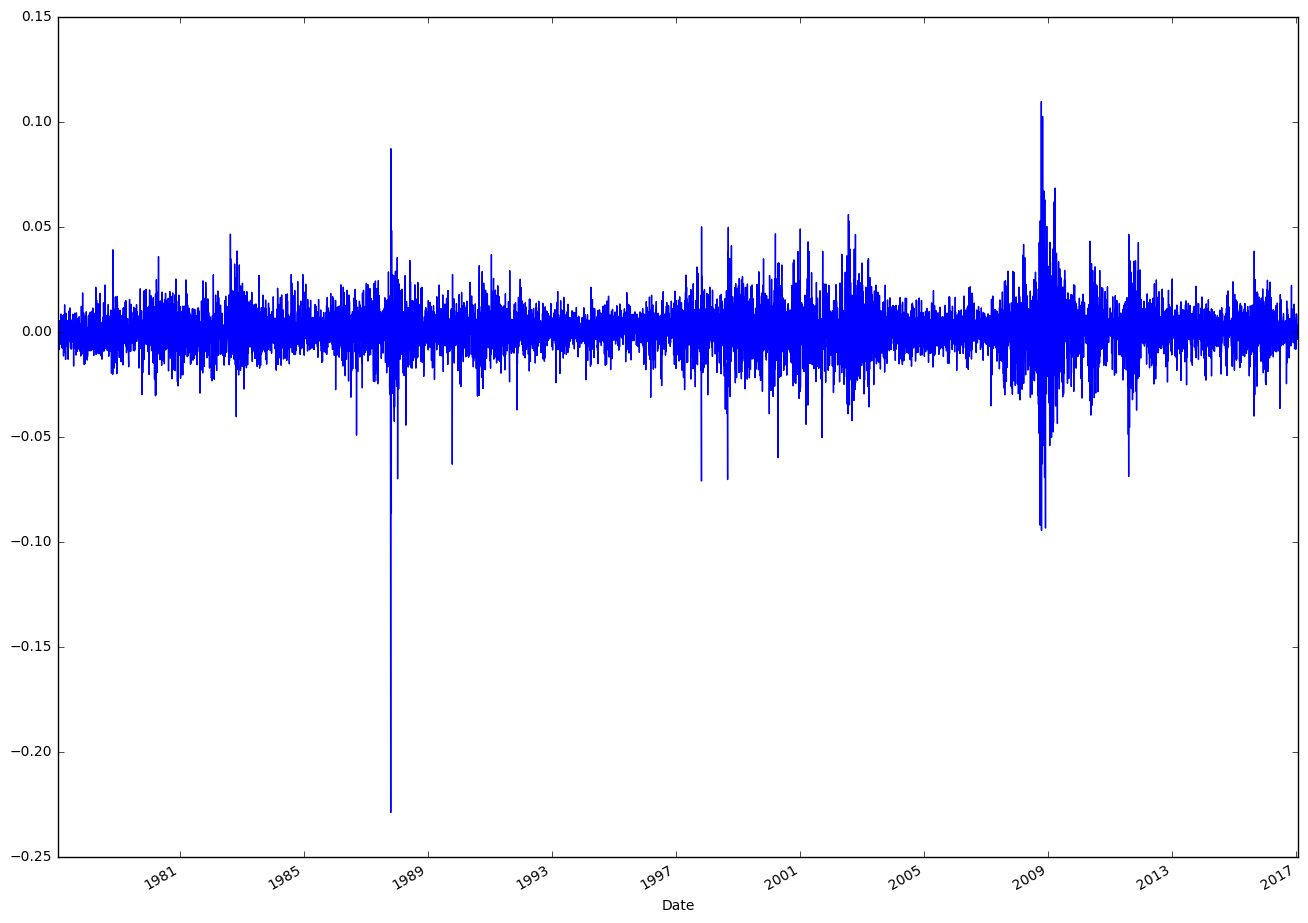

In [10]:
stocks['Logged First Difference'] = stocks['Natural Log'] - stocks['Natural Log'].shift()
stocks['Logged First Difference'].plot(figsize=(16,12))

In [11]:
# import seaborn as sb
stocks['Lag 1'] = stocks['Logged First Difference'].shift()
stocks['Lag 2'] = stocks['Logged First Difference'].shift(2)
stocks['Lag 5'] = stocks['Logged First Difference'].shift(5)
stocks['Lag 30'] = stocks['Logged First Difference'].shift(30)
sb.jointplot('Logged First Difference', 'Lag 1', stocks, kind='reg', size=13)

NameError: name 'sb' is not defined

In [14]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stocks['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(stocks['Logged First Difference'].iloc[1:])

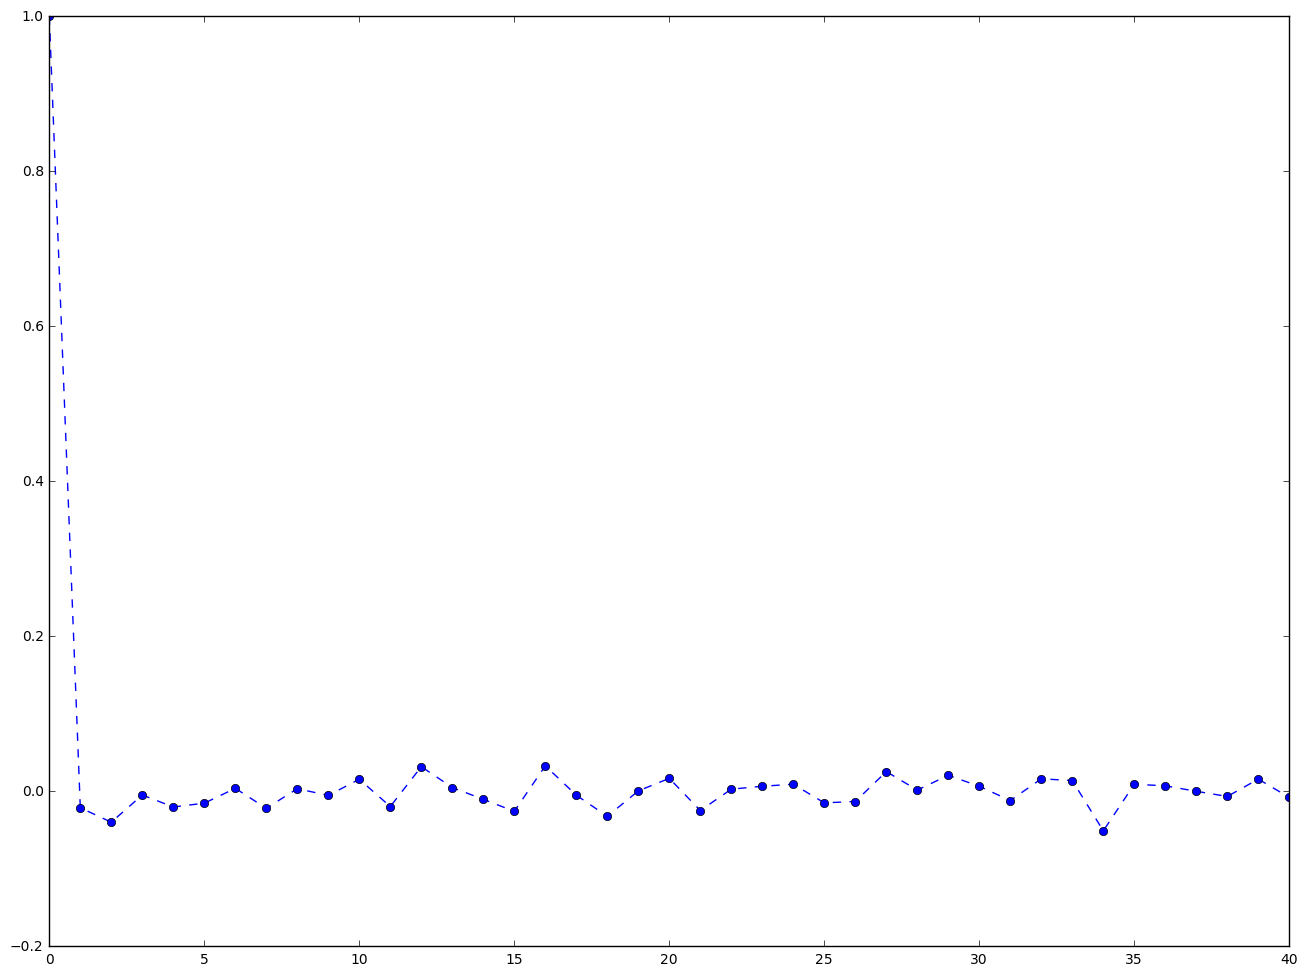

In [15]:
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlations, marker='o', linestyle='--')

/Users/vsquared/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


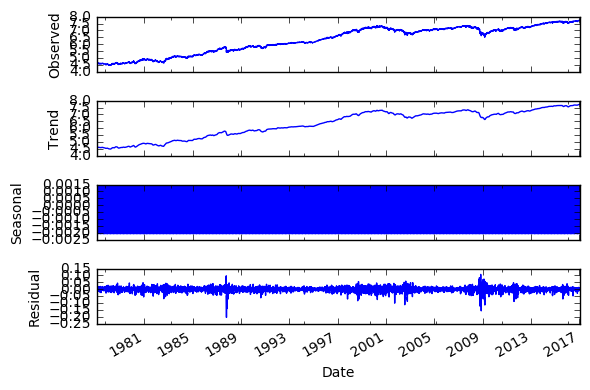

In [16]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stocks['Natural Log'], model="additive", freq=30)
fig = plt.figure()
fig = decomposition.plot()

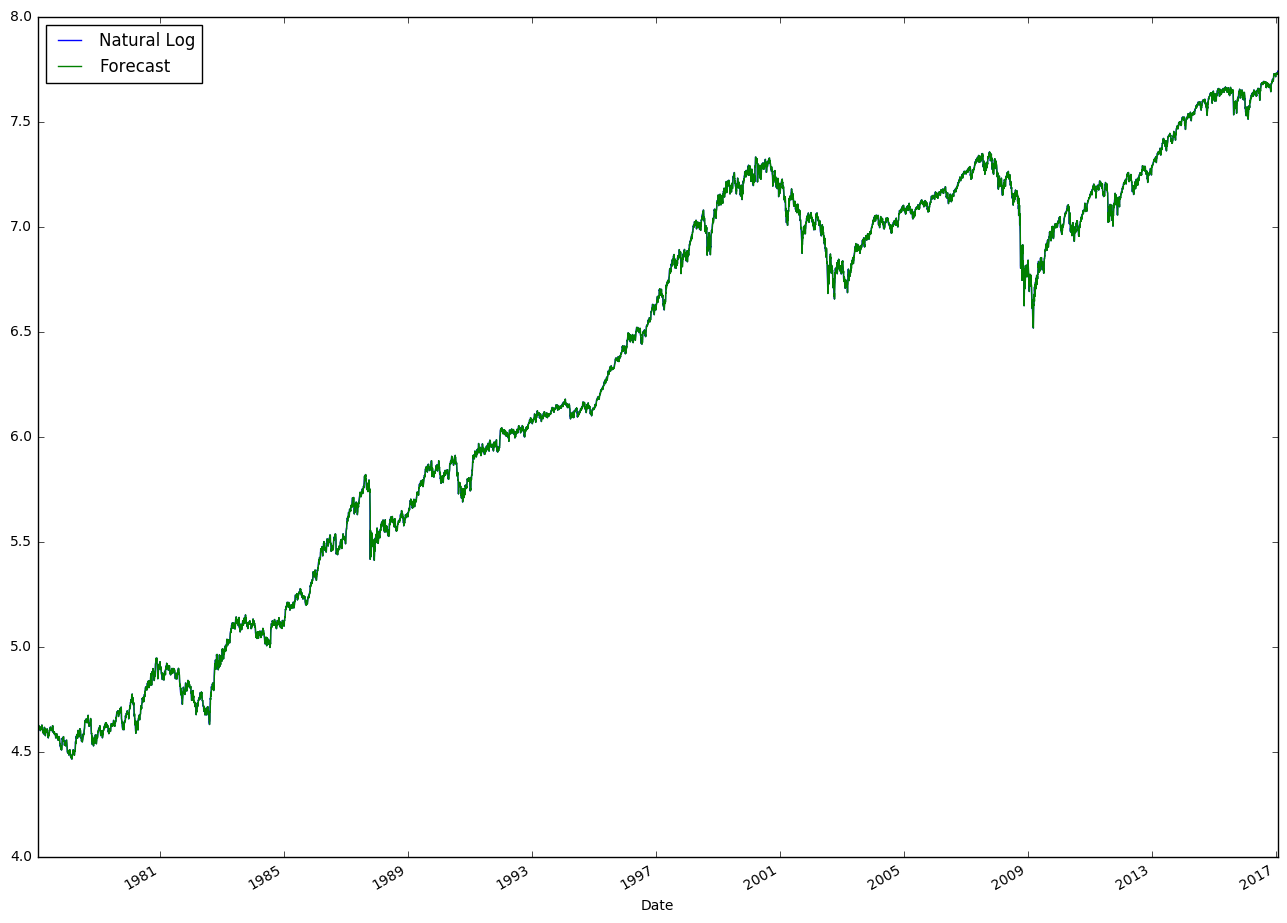

In [17]:
# fitting ARIMA models
# moving average model
model = sm.tsa.ARIMA(stocks['Natural Log'].iloc[1:], order=(1,0,0))
results = model.fit(disp=-1)
stocks['Forecast'] = results.fittedvalues
stocks[['Natural Log', 'Forecast']].plot(figsize=(16,12))

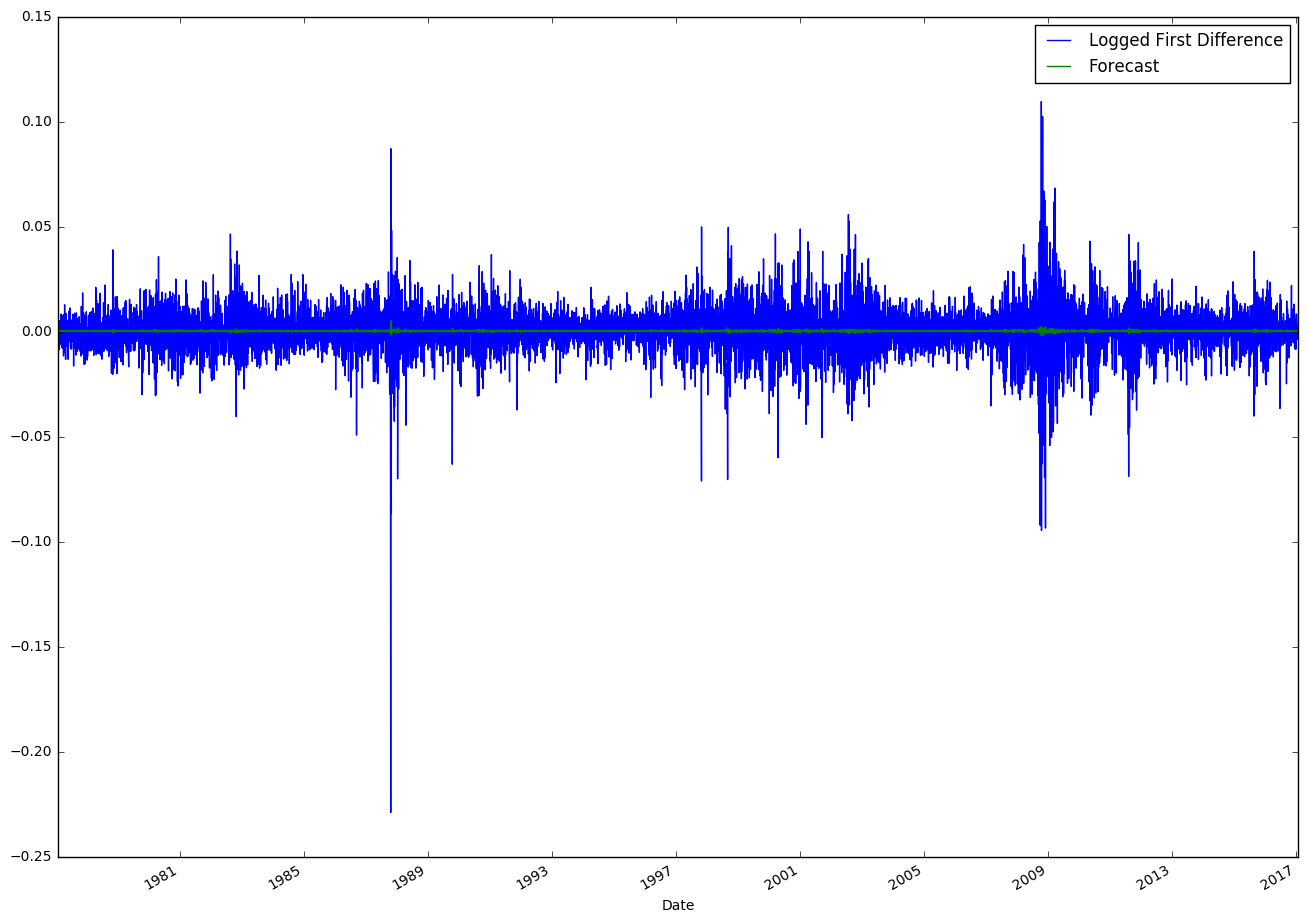

In [18]:
model = sm.tsa.ARIMA(stocks['Logged First Difference'].iloc[1:], order=(1,0,0))
results = model.fit(disp=-1)
stocks['Forecast'] = results.fittedvalues
stocks[['Logged First Difference', 'Forecast']].plot(figsize=(16,12))

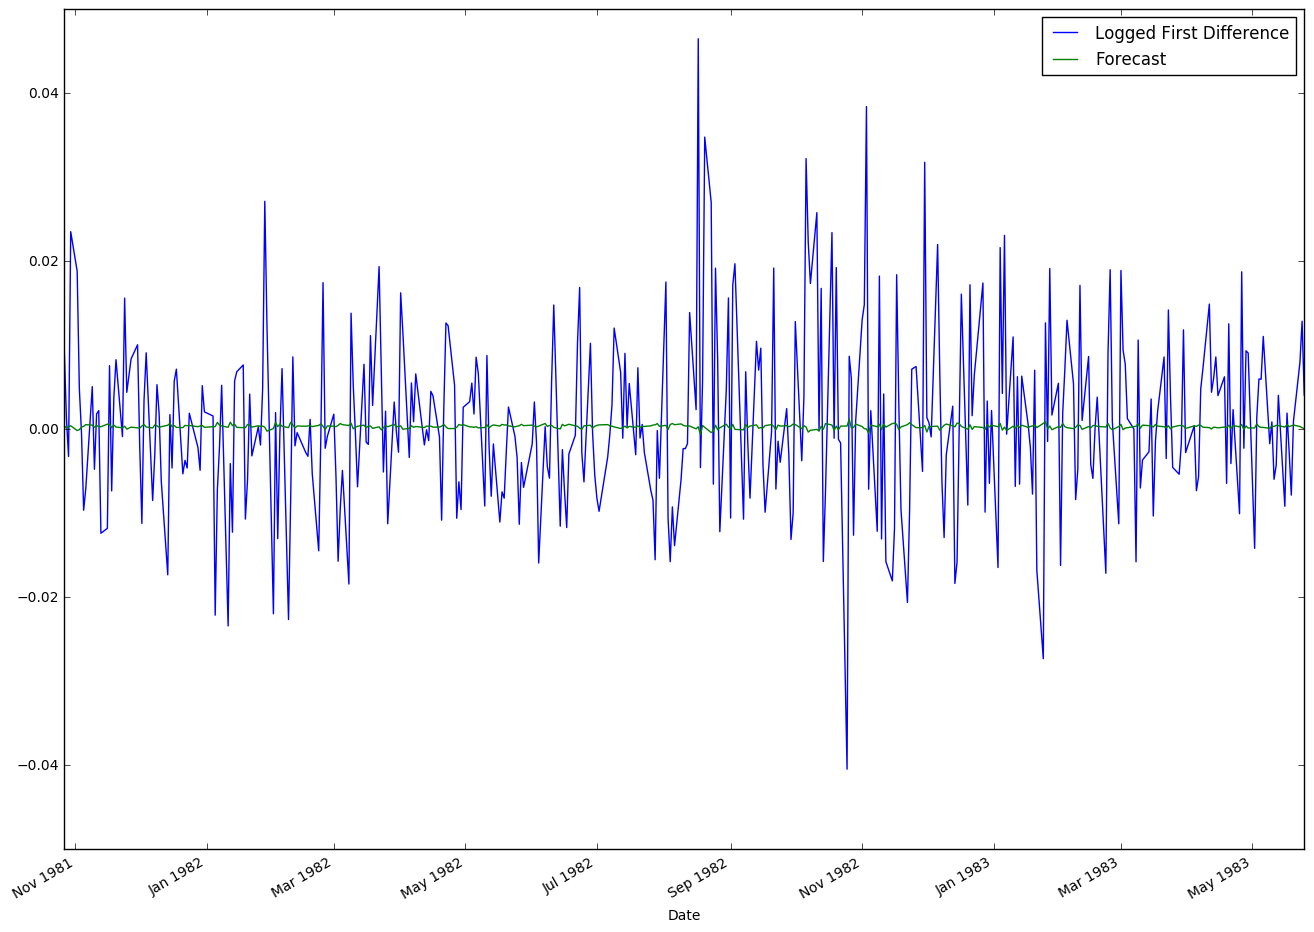

In [19]:
stocks[['Logged First Difference', 'Forecast']].iloc[1200:1600,:].plot(figsize=(16,12))

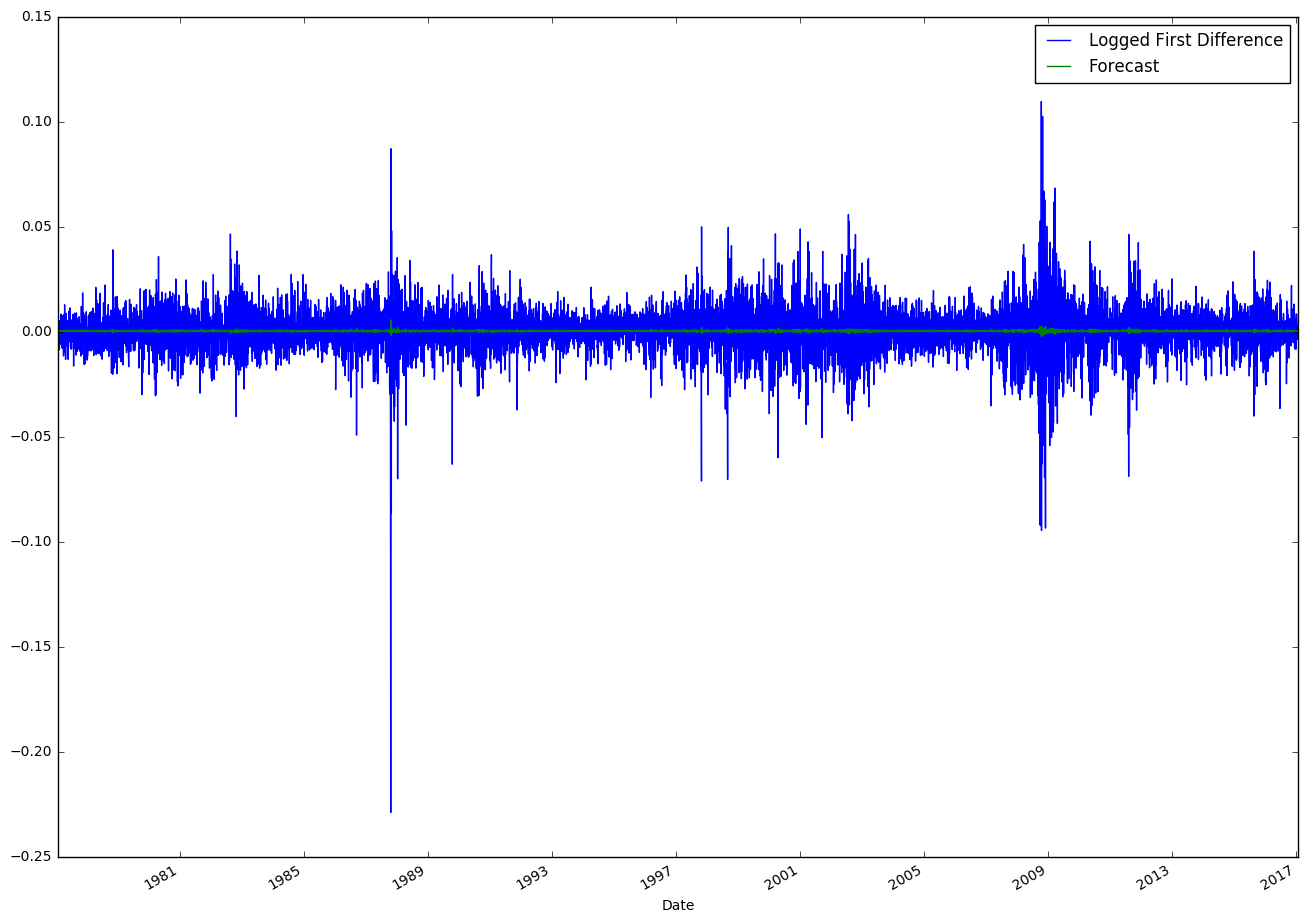

In [20]:
model = sm.tsa.ARIMA(stocks['Logged First Difference'].iloc[1:], order=(0,0,1))
results = model.fit(disp=-1)
stocks['Forecast'] = results.fittedvalues
stocks[['Logged First Difference', 'Forecast']].plot(figsize=(16,12))